C:\Users\shail sharma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


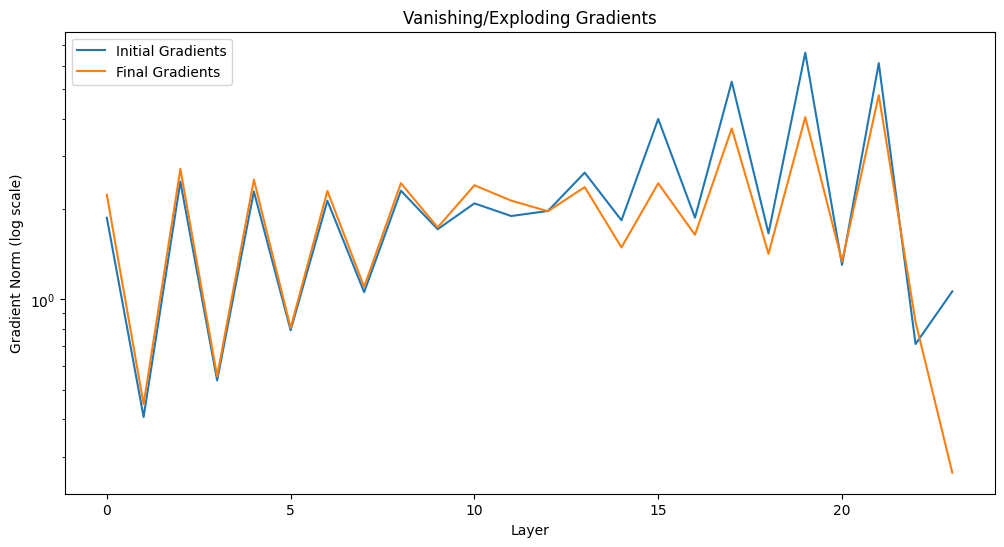

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate some random data
X = np.random.randn(1000, 20)
y = np.random.randint(0, 2, size=(1000, 1))

# Define a simple neural network with many layers
model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu'))
for _ in range(10):  # Adding multiple layers to demonstrate vanishing/exploding gradients
    model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy')

# Function to get gradients
def get_gradients(model, X, y):
    with tf.GradientTape() as tape:
        y_pred = model(X, training=True)
        loss = tf.keras.losses.binary_crossentropy(y, y_pred)
    gradients = tape.gradient(loss, model.trainable_variables)
    return gradients

# Get initial gradients
initial_gradients = get_gradients(model, X, y)

# Train the model for a few epochs and get gradients
history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)
final_gradients = get_gradients(model, X, y)

# Plot the gradients
initial_gradients_norm = [np.linalg.norm(g) for g in initial_gradients if g is not None]
final_gradients_norm = [np.linalg.norm(g) for g in final_gradients if g is not None]

plt.figure(figsize=(12, 6))
plt.plot(initial_gradients_norm, label='Initial Gradients')
plt.plot(final_gradients_norm, label='Final Gradients')
plt.yscale('log')
plt.xlabel('Layer')
plt.ylabel('Gradient Norm (log scale)')
plt.title('Vanishing/Exploding Gradients')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from IPython.display import HTML

# Create a sample dataframe
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35], 'Gender': ['F', 'M', 'M']})

# Save the dataframe to a CSV file
csv_file = 'output.csv'
df.to_csv(csv_file, index=False)

# Create a download link
def create_download_link(filename):
    return HTML(f'<a href="{filename}" download>Download {filename}</a>')

# Display the download link
create_download_link(csv_file)

In [12]:
def create_google_drive_link(file_id):
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Example usage
file_id = 'your_google_drive_file_id_here'
download_link = create_google_drive_link(file_id)
print(download_link)

https://drive.google.com/uc?export=download&id=your_google_drive_file_id_here


In [2]:
import pandas as pd

In [5]:
df=pd.read_csv('placement.csv')
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [9]:
# Save the DataFrame to a CSV file
csv_file = 'placement.csv'
df.to_csv(csv_file, index=False)

# Function to create a Google Drive download link
def create_google_drive_link(file_id):
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Example usage
file_id = 'your_google_drive_file_id_here'  # Replace with your actual file ID after uploading
download_link = create_google_drive_link(csv_file)
print(download_link)

https://drive.google.com/uc?export=download&id=placement.csv
